# Calculating temporal variance with and without seasonal cycle

In [2]:
using CABLAB
using ImageMagick

A Cube is defined via its path and some a single variable is read into memory.

In [3]:
c             = Cube("/Net/Groups/BGI/scratch/DataCube/v1/brockmann-consult.de/datacube/")
cdata         = getCubeData(c,variable=["SoilMoisture"],latitude=(35,65), longitude=(-15,40));

Here we demonstrate how to add a user-defined function to use the DAT's capabilities. First we define the function that has the signature *xin* (input data), *xout* (output data), *maskin* (input mask), *maskout* (output mask). In this case it simply cacluates the variance of a time series. Then we call the @registerDATFunction macro, which creates a wrapper around the function and makes it applicable to a Cube object. 

In [4]:
function varianceTime{T}(xin::AbstractVector{T},xout::AbstractArray{T,0},maskin::AbstractVector,maskout::AbstractArray{UInt8,0})
  s=zero(T)
  s2=zero(T)*zero(T)
  n=0
  for i in eachindex(xin)
    if maskin[i]==CABLAB.VALID
      s+=xin[i]
      s2+=xin[i]*xin[i]
      n+=1
    end
  end
  if n>0
    m=s/n
    v=s2/n-m*m
    xout[1]=v
    maskout[1]=CABLAB.VALID
  else
    maskout[1]=CABLAB.MISSING
  end
end

@registerDATFunction varianceTime (TimeAxis,) ();

Here we call the function with our 3D data cube as its argument.

In [5]:
v1             = map(varianceTime,cdata);

In [6]:
cube_anomalies = map(removeMSC,cdata,46);
v2             = map(varianceTime,cube_anomalies);

We get the spatial mean of the time variances

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"SoilMoisture",true)

Interact.Slider{Float64}(Signal{Float64}(12.25, nactions=0),"Longitude",12.25,-15.0:0.25:39.75,true)

Interact.Slider{Float64}(Signal{Float64}(50.0, nactions=0),"Latitude",50.0,35.25:0.25:65.0,true)

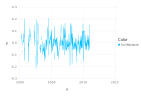

In [7]:
plotTS(cube_anomalies)

And show the maps of variances:

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(1, nactions=0),"",1,"SoilMoisture",Interact.OptionDict(Any["SoilMoisture"],Dict{Any,Any}("SoilMoisture"=>1)),Any[],Any[])

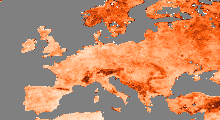

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(1, nactions=0),"",1,"SoilMoisture",Interact.OptionDict(Any["SoilMoisture"],Dict{Any,Any}("SoilMoisture"=>1)),Any[],Any[])

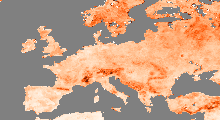

In [8]:
plotMAP(v1,dmin=0.0f0,dmax=0.01f0)
plotMAP(v2,dmin=0.0f0,dmax=0.01f0)

In [7]:
mv1=map(spatialMean,v1)
mv2=map(spatialMean,v2)
println("Mean variance with seasonal cycle: ", mv1)
println("Mean variance without seasonal cycle: ", mv2)

Mean variance with seasonal cycle: CABLAB.CachedArrays.TempCubes.TempCube{Float32,1}(CABLAB.CubeAPI.Axes.CubeAxis[CABLAB.CubeAPI.Axes.VariableAxis(UTF8String["SoilMoisture"])],"/Net/Groups/BGI/scratch/fgans/cubes/tmp/juliaLA0Z3ICABLAB.Proc.Stats.spatialMean",CartesianIndex{1}((1,)))
Mean variance without seasonal cycle: CABLAB.CachedArrays.TempCubes.TempCube{Float32,1}(CABLAB.CubeAPI.Axes.CubeAxis[CABLAB.CubeAPI.Axes.VariableAxis(UTF8String["SoilMoisture"])],"/Net/Groups/BGI/scratch/fgans/cubes/tmp/juliadyqaXWCABLAB.Proc.Stats.spatialMean",CartesianIndex{1}((1,)))


In [6]:
function customgapFill(xin,xout,maskin,maskout)
    #Content here
end
function newOutlierDetect(xin,xout,maskin,maskout)
    #Content here
end

newOutlierDetect (generic function with 1 method)

In [8]:
@registerDATFunction customgapFill (TimeAxis,) (TimeAxis,)
@registerDATFunction newOutlierDetect (VariableAxis,TimeAxis) (TimeAxis,);